**Brief Honor Code**. Do the homework on your own. You may discuss ideas with your classmates, but DO NOT copy the solutions from someone else or the Internet. If stuck, discuss with TA.

In [239]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import string
import toolz as tz
import seaborn as sns

**1**. (10 points)

Write a function `pdsist(xs)` which returns a matrix of the pairwise distance between the collection of vectors in `xs` using Euclidean distance.

Recall that Euclidean distance between two vectors $x$ and $y$ is

$$
d(x, y) = \sqrt{\sum{(y-x)^2}}
$$ 

Find the square distance matrix for
```python
xs = np.array([[0.20981496, 0.54777461, 0.9398527 ],
       [0.63149939, 0.935947  , 0.29834026],
       [0.46302941, 0.25515557, 0.0698739 ],
       [0.38192644, 0.42378508, 0.26055664],
       [0.46307302, 0.05943961, 0.60204931]])
```

Do this **without** using any for loops.

In [134]:
def pdsist(xs):
    """This function returns a matrix of 
    the pairwise distance of xs"""
    return np.sum((xs[None,:] - xs[:, None])**2, -1)**0.5
    
xs = np.array([[0.20981496, 0.54777461, 0.9398527 ],
       [0.63149939, 0.935947  , 0.29834026],
       [0.46302941, 0.25515557, 0.0698739 ],
       [0.38192644, 0.42378508, 0.26055664],
       [0.46307302, 0.05943961, 0.60204931]])

pdsist(xs)

array([[ 0.        ,  0.86025216,  0.9521589 ,  0.71164521,  0.64553997],
       [ 0.86025216,  0.        ,  0.73760151,  0.57098519,  0.9428    ],
       [ 0.9521589 ,  0.73760151,  0.        ,  0.26715821,  0.56702329],
       [ 0.71164521,  0.57098519,  0.26715821,  0.        ,  0.50591465],
       [ 0.64553997,  0.9428    ,  0.56702329,  0.50591465,  0.        ]])

**2**. (20 points)

Wikipedia gives this algorithm for finding prime numbers

To find all the prime numbers less than or equal to a given integer n by Eratosthenes' method:

- Create a list of consecutive integers from 2 through n: (2, 3, 4, ..., n).
- Initially, let p equal 2, the smallest prime number.
- Enumerate the multiples of p by counting to n from 2p in increments of p, and mark them in the list (these will be 2p, 3p, 4p, ...; the p itself should not be marked).
- Find the first number greater than p in the list that is not marked. If there was no such number, stop. Otherwise, let p now equal this new number (which is the next prime), and repeat from step 3.
- When the algorithm terminates, the numbers remaining not marked in the list are all the primes below n.

Find all primes less than 1,000 using this method.

- You may use `numpy` and do not have to follow the algorithm exactly if you can achieve the same results.

In [135]:

def findprime(n, p=2):
    """find prime numbers using Eratosthenes method"""
    primes = np.ones(n+1, dtype = bool)
    for i in np.arange(2, n**0.5+1, dtype = np.uint32):
        if primes[i]:
            primes[i**2::i] = False
    return np.nonzero(primes)[0][2:]

#find prime of first 1000 numbers.
findprime(1000)

array([  2,   3,   5,   7,  11,  13,  17,  19,  23,  29,  31,  37,  41,
        43,  47,  53,  59,  61,  67,  71,  73,  79,  83,  89,  97, 101,
       103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167,
       173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239,
       241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313,
       317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397,
       401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467,
       479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569,
       571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643,
       647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733,
       739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823,
       827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911,
       919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997])

**3**. (20 points)

- Load the `iris` data set from R into a `pandas` DataFrame and create a new DataFrame `iris_scaled` where each feature (column) has zero mean and unit standard deviation (5)
- Calculate a pairwise distance matrix (using Euclidean distance) of the normalized features for each flower using the function you wrote in **1** (5)
- Using `seaborn`, plot a `clustermap` of the original `iris` data, with row color labels for the Species (5)
![clustermap](figs/iris_clustermap.png) 
- Using a single `seaborn` function, make a 2 by 2 grid of boxplots for each feature to compare across iris species. The y-axis scale need not be the same across subplots. (5)
![boxplots](figs/iris_boxplots.png)

In [240]:
#import iris data into pandas dataframe.
iris = sns.load_dataset("iris")
species = iris.pop("species")
iris_df = pd.DataFrame(iris)
iris_df.columns = ["Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width"]

#normalized dataset
iris_scale = (iris_df-iris_df.mean())/iris_df.std()
iris_scale.head(10)



,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052
5,-0.535384,1.933315,-1.165809,-1.048667
6,-1.501490,0.786174,-1.335752,-1.179859
7,-1.018437,0.786174,-1.279104,-1.311052
8,-1.743017,-0.360967,-1.335752,-1.311052
9,-1.139200,0.097889,-1.279104,-1.442245


In [137]:
#calculate distance matrix
distance = pdsist(iris_scale.values)
print(distance)

[[ 0.          1.1722914   0.84278401 ...,  3.79270577  3.81338223
   3.32392896]
 [ 1.1722914   0.          0.52162552 ...,  3.73412795  4.00393113
   3.20274689]
 [ 0.84278401  0.52162552  0.         ...,  3.92339738  4.05911739
   3.36904951]
 ..., 
 [ 3.79270577  3.73412795  3.92339738 ...,  0.          1.06826493
   0.77270365]
 [ 3.81338223  4.00393113  4.05911739 ...,  1.06826493  0.          1.19692065]
 [ 3.32392896  3.20274689  3.36904951 ...,  0.77270365  1.19692065  0.        ]]


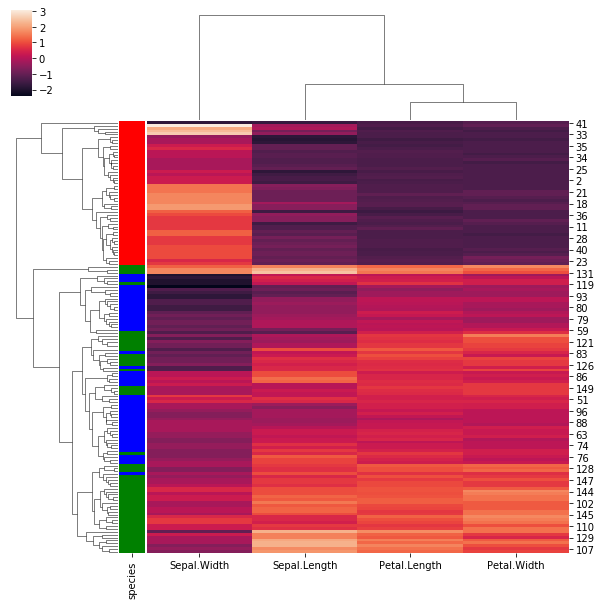

In [241]:
#plot clustermap
lut = dict(zip(species.unique(), "rbg"))
row_colors = species.map(lut)
g = sns.clustermap(iris_df, row_colors=row_colors, z_score=1)
g

pass

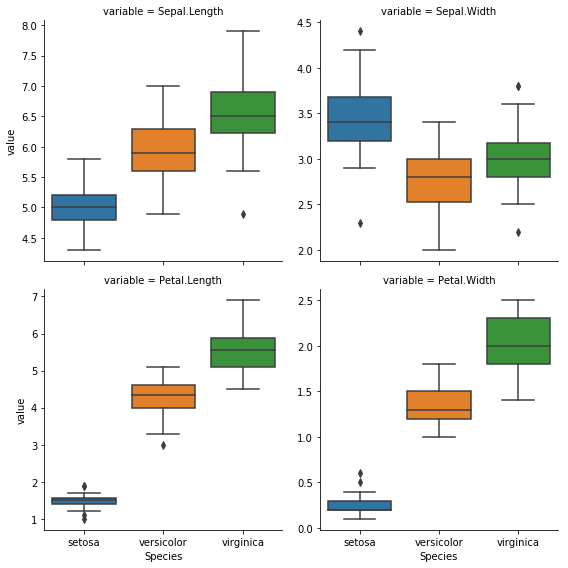

In [242]:
#create factor plot
iris = pd.DataFrame(sns.load_dataset("iris"))
iris.columns = ["Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width", "Species"]
df = pd.melt(iris,id_vars=['Species'])

sns.factorplot(x='Species', y='value', col = 'variable', kind = "box",
                   col_wrap=2, sharey=False, data=df)
pass

**4**. (50 points)

This is an example of the messiness of real-life data munging, using a (truncated and randomized) data set provided by an HIV researcher. In this data set, HIV-positive subjects were tested for sexually transmitted infections (STI) at each visit (and treated if they were positive). 

You will probably need to review the `pandas` documentation and examples carefully to complete this exercise.

The file 'hiv.csv' contains data the HIV subjects. The variables are

- PID: A randomly generated patient ID
- Race: The race of the subject as a single letter code
- Age: The age of the subject at study entry
- Visit Date: Date of visit at which STI data was collected
- STIs: Type of STI detected if any

The Race and Age of each subject are only recorded for the first visit.

Objectives:

- Read the data set into a `pandas` DataFrame (5)
- Fill up the missing Race and Age values (5)
- Reclassify the STIs into one of the following categories ('none', 'syphilis', 'chlamydia', 'gonorrhea', 'HCV',  NaN) by grouping in the obvious way. Note that 'none' means no infection and NaN (np.nan) means missing data. (10)
- FInd the subject(s) with the most number of visits (how many are there?) (5)
- Perform a chi-square test to see if an STI at the **first** visit is associated with the risk of an STI at **any** subsequent visit. You only need to do this for subjects who have more than 1 visit. You can use `from scipy.stats import chi2_contingency` to do the $\chi^2$ test. (20)

In [243]:
#read data
df = pd.read_csv("data/hiv.csv")
df.head(10)

,Unnamed: 0,PID,Race,Age,Visit Date,STIs
0,0,9933,W,61.0,2013-12-24,none
1,1,9933,NaN,NaN,2015-07-18,none
2,2,9933,NaN,NaN,2016-01-23,none
3,3,9933,NaN,NaN,2013-10-14,syphilis
4,4,9933,NaN,NaN,2013-12-23,none
5,5,9933,NaN,NaN,2014-06-30,none
6,6,9933,NaN,NaN,2018-03-10,syphilis
7,7,9631,A,69.0,2015-07-28,none
8,8,9631,NaN,NaN,2015-12-26,none
9,9,9631,NaN,NaN,2016-07-02,none


In [244]:
#fill up missing race and Age value
df['Race'] = df['Race'].fillna(method = "pad")
df['Age'] = df['Age'].fillna(method = "pad")
df.head(10)

,Unnamed: 0,PID,Race,Age,Visit Date,STIs
0,0,9933,W,61.0,2013-12-24,none
1,1,9933,W,61.0,2015-07-18,none
2,2,9933,W,61.0,2016-01-23,none
3,3,9933,W,61.0,2013-10-14,syphilis
4,4,9933,W,61.0,2013-12-23,none
5,5,9933,W,61.0,2014-06-30,none
6,6,9933,W,61.0,2018-03-10,syphilis
7,7,9631,A,69.0,2015-07-28,none
8,8,9631,A,69.0,2015-12-26,none
9,9,9631,A,69.0,2016-07-02,none


In [245]:
#rename categories of STIs
df["STIs"] = df["STIs"].str.split('-').str[0]
df["STIs"].replace('None', 'none', inplace=True)
set(df["STIs"])

{'HCV', 'chlamydia', 'gonorrhea', nan, 'none', 'syphilis'}

In [246]:
#find the subjects with most number of visits
count = df[['PID','Visit Date']].groupby('PID', as_index = False).agg('count')
count.max()

PID           9996
Visit Date      16
dtype: int64

In [247]:
from scipy.stats import chi2_contingency
df["Visit Date"] =pd.to_datetime(df["Visit Date"])
df = df.sort_values(by=['PID', 'Visit Date'], ascending=[True, True])
#remove observations with missing value in STIs and drop observationw with only one visit
df = df[df['STIs'].notnull()]
df = df[df.PID.isin(count.PID[count['Visit Date']>1])]
df['boolean'] = np.where(df['STIs']=='none', 0, 1)

In [248]:
#construct contigency table
crosstable = np.array([[0,0],[0,0]])
for i in set(df.PID.tolist()):
    crosstable[int(df[df.PID == i].boolean.tolist()[0] > 0),
           int(sum(df[df.PID == i].boolean.tolist()[1:]) > 0)] += 1
crosstable

array([[90, 18],
       [14, 22]])

In [249]:
#perform chi-square test
chi2, p, dof, expected = chi2_contingency(crosstable)
chi2, p, dof, expected

(24.415384615384617, 7.7646147686769707e-07, 1, array([[ 78.,  30.],
        [ 26.,  10.]]))

In [250]:
#based on the p-value, we conclude that if an STI at the first visit is associated with 
#the risk of an STI at any subsequent visit